In [32]:
import numpy as np

### 정규방정식

In [35]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

In [3]:
import matplotlib.pyplot as plt

- 정규방정식을 테스트하기 위해 선형처럼 보이는 데이터 생성

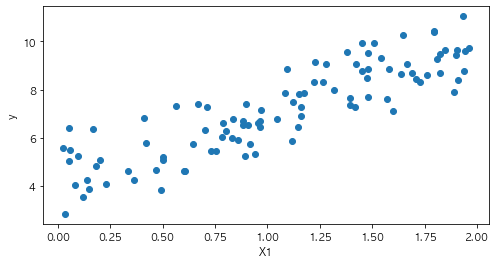

In [36]:
plt.figure(figsize=(8, 4))
plt.scatter(X, y)
plt.xlabel('X1')
plt.ylabel('y')
plt.show()

* 데이터 생성에 사용한 함수 : y = 4 + 3x + 가우시안 잡음 

In [37]:
X_b = np.c_[np.ones((100, 1)), X] # 모든 샘플에 x0 = 1을 추가
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [38]:
theta_best

array([[4.19482579],
       [2.81984695]])

- 정규방정식으로 계산한 값
- 위의 수는 세타 0, 아래는 세타 1 
- 원래 각각 4, 3이 나와야 하는데 틀린 이유는 가우시안 잡음때문에 맞추지 못했다.

In [43]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # 모든 샘플에 x0 = 1을 추가
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.19482579],
       [9.8345197 ]])

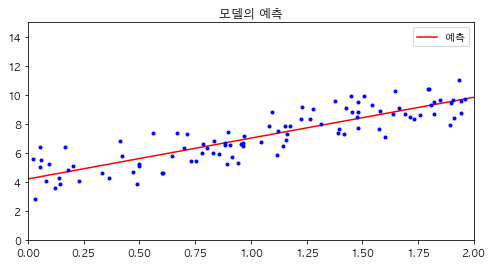

In [44]:
plt.figure(figsize=(8, 4))
plt.plot(X_new, y_predict, 'r-', label = '예측')
plt.plot(X, y, 'b.')
plt.axis([0, 2, 0, 15])
plt.legend()
plt.title("모델의 예측")
plt.show()

### 선형회귀 수행

In [45]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [46]:
lin_reg.intercept_, lin_reg.coef_

(array([4.19482579]), array([[2.81984695]]))

In [47]:
lin_reg.predict(X_new)

array([[4.19482579],
       [9.8345197 ]])

- lstsq(): 최소 제곱 해를 선형 행렬 방정식으로 반환하는 함수

In [48]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond = 1e-6)
theta_best_svd

array([[4.19482579],
       [2.81984695]])

- pinv(): 역행렬이 존재하지 않는 경우 부분적으로 역행렬과 유사한 역할을 할 수 있는 행렬을 구하는 함수

In [49]:
np.linalg.pinv(X_b).dot(y)

array([[4.19482579],
       [2.81984695]])

### 계산복잡도
- 특성 수가 두배로 늘어나면 계산시간이 증가한다.
- 사용하는 방법에 따라 증가하는 시간은 다를 수 있다.

### 경사 하강법
- 여러 종류의 문제에서 최적의 해법을 찾을 수 있는 일반적인 최적화 알고리즘
- 비용함수를 최소화하기 위해 반복해서 파라미터 조정
- 경사하강법을 설명할 떄 드는 예시인데, 안개가 많은 산에서 빨리 내려갈 수 있는 방법은 가파른 길을 따라 내려가는 것. 이게 경사하강법의 원리
- 비용함수의 현재 그래디언트( = 비용함수 미분값) 계산 후 그래디언트가 감소하는 방향으로 진행 , 0이 되면 최솟값에 도달했다고 판단
- 결론적으로는 최솟값을 찾아가는 과정입니다. 
- 경사하강법에서 중요한 파라미터는 스텝의 크기로 학습률이다. 학습률이 너무 작으면 조금씩 내려가져서 시간이 너무 오래 걸리고, 또 너무 크면 여기저기 튀면서 최솟값을 그냥 지나쳐버려서 최솟값에 도달하기 어렵다. 
- 그런데 비용함수가 다 이렇게 둥그럴수만은 없다. 구불구불한 선이 될 수도 있는데, 그 경우엔 지역 최솟값에 도달하는 문제가 생긴다. 
- 지역 최솟값, 전역 최솟값을 설명해보면 구불구불한 비용함수에서는 평탄한 곳이 나오거나, 내려갔다 올라오는 곳이 있으면 기울기가 0인 부분이 여러개가 될 수 있는데 기울기가 0인 모든 곳 중에서 최솟값인 곳이 전역 최솟값이고 나머지 부분은 지역최솟값이다. 
- 그런데 우리가 구하려는 선형회귀를 위한 mse 비용함수는 볼록함수로 지역 최솟값이 없다. 
- 특성이 두개 있는데 각 특성들의 스케일(단위)가 같으면 최솟값으로 빠르게 도달할 수 있고, 스케일이 많이 차이나면 시간이 오래 걸린다. 
- 이 경우에는 스케일링을 해주면 빠르게 최솟값을 찾을 수 있다. 
- 

### 배치 경사하강법
- 경사하강법을 구현하려면 각 모델 파라미터에 대해 비용 함수의 그래디언트를 계산해야 한다. 이건 파라미터가 조금 변경될 때 비용함수가 어떻게 바뀌는지 계산해야 한다는 말. 이게 편도함수이다. 

In [50]:
eta = 0.1
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)

for iteration in range(n_iterations):
    gradients = 2/m*X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [51]:
theta

array([[4.19482579],
       [2.81984695]])

In [52]:
n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):
    return t0 / (t+t1)

theta = np.random.randn(2,1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2*xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

In [53]:
theta

array([[4.18931946],
       [2.8165846 ]])

In [54]:
m

100

In [55]:
m = 100
X = 6*np.random.rand(m, 1) - 3
y = 0.5*X**2 + X+2 + np.random.randn(m,1)

### -> y = 0.5*x**2 + x + 가우시안 잡음

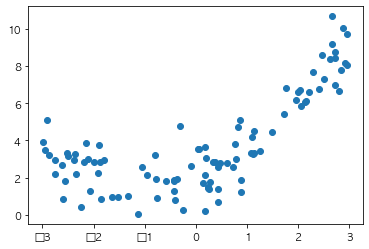

In [60]:
plt.scatter(X, y)

## 다항회귀 
- 특성의 제곱으로 특성 수를 늘려 복잡화시킨다.(과소적합 해결)
- degree가 커지면 과대적합에 가까워진다.

In [95]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree = 2, include_bias=False)
X_poly = poly_features.fit_transform(X)


In [57]:
X[0]

array([0.76397445])

In [58]:
X_poly[0]

array([0.76397445, 0.58365695])

In [61]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.08338349]), array([[0.97187604, 0.496276  ]]))

# 학습곡선
- 과소적합 / 과대적합을 판단할 수 있는 기준 

In [99]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), 'r-+', linewidth=2, label='훈련세트')
    plt.plot(np.sqrt(val_errors), 'b-', linewidth=3, label='검증세트')
    plt.legend()
    plt.xlim(0, 80)
    plt.ylim(0, 3)
    plt.show()

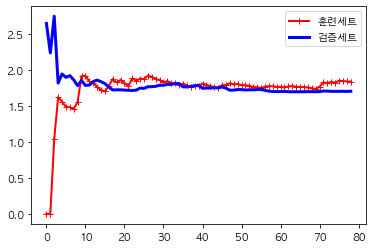

In [93]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

### 과소적합
- 초반에 적은 수의 데이터로 훈련을 했을 땐, 훈련셋의 오차가 작기 때문에 오차 0부터 시작하는 모양의 그래프가 되고, 검증셋의 오류는 크기 때문에 위에서부터 내려오는 모양의 그래프가 된다. 
- 학습을 거듭하다보면 훈련셋의 오차는 늘어나고 검증셋의 오차는 줄어들어 중간에서 두 그래프가 만나게 된다.

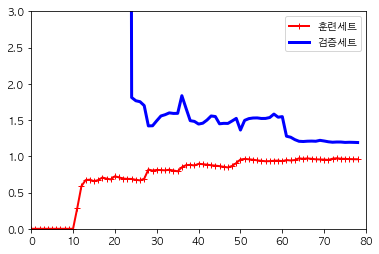

In [100]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("line_reg", LinearRegression())
])

plot_learning_curves(polynomial_regression, X, y)


### 과대적합
- 가운데의 공간이 훈련셋에는 잘 맞는데 검증셋은 잘 맞추지 못한다는걸 나타낸다. --> 과대적합을 의미함
- 과대적합 해결? 
    * 규제 모델 활용
    * 훈련 조기종료 
   

# Logistic Regression

In [101]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename']

In [102]:
X = iris['data'][:, 3:] # 꽃잎너비
y = (iris['target'] ==2).astype(np.int) # 1 Iris-Virginica 면 1, 아니면 0

- 로지스틱 회귀모델은 이진분류(0/1)만 가능하기 때문에 버지니카 맞음 / 아님 두 클래스만 활용하기로 한다.

In [103]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

### 각 데이터(행)가 버지니카가 맞을 / 아닐 확률을 그래프로 시각화 한다.

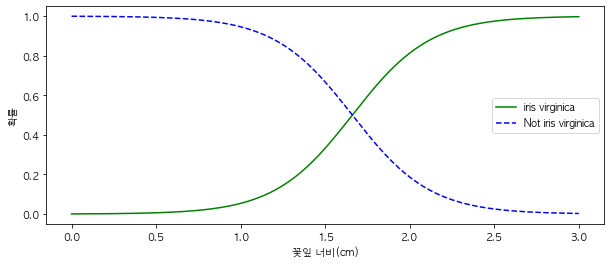

In [111]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.figure(figsize=(10, 4))
plt.plot(X_new, y_proba[:, 1], 'g-', label = 'iris virginica')
plt.plot(X_new, y_proba[:, 0], 'b--', label = 'Not iris virginica')
plt.xlabel('꽃잎 너비(cm)')
plt.ylabel('확률')
plt.legend()
plt.show()

- 대략 1cm 이하일 경우에는 virginica가 절대 아닌걸 확신하고 있다. 
- 대략 2.5cm 이상일 경우에는 virginica가 확실하다고 판단한다.

## Softmax
- 소프트맥스는 로지스틱 모델의 파라미터만 바꾸면 소프트맥스가 된다.

In [112]:
X = iris['data'][:, (2,3)] # 꽃잎 길이, 꽃잎 너비
y = iris['target']

softmax_reg = LogisticRegression(multi_class='multinomial', solver = 'lbfgs', C = 10)
softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial')

In [113]:
softmax_reg.predict([[5, 2]])

array([2])

In [116]:
softmax_reg.predict_proba([[5,2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])